In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# Importing Data

In [126]:
file = pd.read_csv("/content/final_data.csv")

In [127]:
file.dtypes

Station Number         float64
State                   object
Temp Min               float64
Temp Max               float64
DO Min                 float64
DO Max                 float64
pH Min                 float64
pH Max                 float64
Conductivity Min       float64
Conductivity Max       float64
BOD Min                float64
BOD Max                float64
Nitrate Min            float64
Nitrate Max            float64
Faecal Coliform Min    float64
Faecal Coliform Max    float64
Total Coliform Min     float64
Total Coliform Max     float64
dtype: object

In [128]:
file

,Station Number,State,Temp Min,Temp Max,DO Min,DO Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Faecal Coliform Min,Faecal Coliform Max,Total Coliform Min,Total Coliform Max
0,1867.0,HIMACHAL\n PRADESH,9.0,12.0,9.7,10.1,6.80,8.00,92.0,366.0,0.1,0.2,0.2,0.200,2.0,2.0,20.0,20.0
1,2611.0,HIMACHAL\n PRADESH,9.0,12.0,9.7,10.1,6.70,7.90,84.0,327.0,0.1,0.5,0.2,0.500,2.0,2.0,20.0,20.0
2,1389.0,HIMACHAL\n PRADESH,12.0,17.0,9.1,9.6,6.80,8.10,92.0,330.0,0.1,0.5,0.2,0.400,2.0,2.0,20.0,20.0
3,1086.0,HIMACHAL\n PRADESH,14.0,17.0,8.8,9.8,6.96,7.99,107.0,309.0,0.1,0.4,0.2,0.340,2.0,2.0,21.0,21.0
4,1087.0,HIMACHAL\n PRADESH,14.0,17.0,8.7,9.2,6.91,8.04,102.0,298.0,0.1,0.2,0.2,0.513,2.0,2.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,3023.0,TAMIL NADU,23.0,32.0,0.0,2.0,6.60,8.40,899.0,3060.0,20.0,915.0,0.1,4.300,940000.0,280000000.0,1400000.0,470000000.0
4086,3473.0,KERALA,26.0,32.0,4.6,7.7,6.10,7.40,60.0,43000.0,0.2,2.1,0.2,0.600,40.0,200.0,70.0,430.0
4087,3558.0,KARNATAKA,27.0,33.0,7.0,7.2,7.20,8.80,547.0,1594.0,2.0,3.0,0.1,0.400,170.0,1600.0,500.0,1600.0
4088,3562.0,KARNATAKA,26.0,32.0,6.2,6.7,6.70,7.60,52.0,96.0,1.0,1.0,0.0,0.000,11.0,350.0,26.0,1600.0


In [129]:
file1 = file.drop(['Conductivity Min','Conductivity Max','Total Coliform Min','Total Coliform Max'],axis= 1)
file2 = file.copy(True)

In [130]:
file_penum = file1.dropna()
file_penum2 = file2.dropna()

# New Section

In [131]:
# duplicate
# duplicateRowsDF = file_penum[file_penum.duplicated()]
# duplicateRowsDF
file_penum.iloc[:,2:14]

,Temp Min,Temp Max,DO Min,DO Max,pH Min,pH Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Faecal Coliform Min,Faecal Coliform Max
0,9.0,12.0,9.7,10.1,6.80,8.00,0.1,0.2,0.2,0.200,2.0,2.0
1,9.0,12.0,9.7,10.1,6.70,7.90,0.1,0.5,0.2,0.500,2.0,2.0
2,12.0,17.0,9.1,9.6,6.80,8.10,0.1,0.5,0.2,0.400,2.0,2.0
3,14.0,17.0,8.8,9.8,6.96,7.99,0.1,0.4,0.2,0.340,2.0,2.0
4,14.0,17.0,8.7,9.2,6.91,8.04,0.1,0.2,0.2,0.513,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4085,23.0,32.0,0.0,2.0,6.60,8.40,20.0,915.0,0.1,4.300,940000.0,280000000.0
4086,26.0,32.0,4.6,7.7,6.10,7.40,0.2,2.1,0.2,0.600,40.0,200.0
4087,27.0,33.0,7.0,7.2,7.20,8.80,2.0,3.0,0.1,0.400,170.0,1600.0
4088,26.0,32.0,6.2,6.7,6.70,7.60,1.0,1.0,0.0,0.000,11.0,350.0


## Pandas to Numpy array

In [132]:
data1_wqi = np.array(file_penum.iloc[:,2:14])
data2_bod = np.array(file_penum2.iloc[:,2:])

In [133]:
data2_bod.shape

(3931, 16)

In [134]:
data1_wqi.shape

(3938, 12)

In [135]:
final_col_list1 = []
final_col_list2 = []

# For data1_wqi
final_col_list1.append(data1_wqi[:,1] - data1_wqi[:,0])
for i in range(2,12,2):
    col_mean = (data1_wqi[:,i] + data1_wqi[:,i+1])/2
    final_col_list1.append(col_mean)

# For data2_bod
final_col_list2.append(data2_bod[:,1] - data2_bod[:,0])
for i in range(2,16,2):
    col_mean = (data2_bod[:,i] + data2_bod[:,i+1])/2
    final_col_list2.append(col_mean)

# transpose this
tmp_arr_wqi = np.array(final_col_list1)
tmp_arr_bod = np.array(final_col_list2)

In [136]:
# convert this to pandas dataframe
tmp_arr_wqi.T

array([[3.000e+00, 9.900e+00, 7.400e+00, 1.500e-01, 2.000e-01, 2.000e+00],
       [3.000e+00, 9.900e+00, 7.300e+00, 3.000e-01, 3.500e-01, 2.000e+00],
       [5.000e+00, 9.350e+00, 7.450e+00, 3.000e-01, 3.000e-01, 2.000e+00],
       ...,
       [6.000e+00, 7.100e+00, 8.000e+00, 2.500e+00, 2.500e-01, 8.850e+02],
       [6.000e+00, 6.450e+00, 7.150e+00, 1.000e+00, 0.000e+00, 1.805e+02],
       [4.000e+00, 6.300e+00, 4.100e+00, 1.500e+00, 3.500e-01, 1.110e+02]])

In [137]:
# final_preprocessed data
final_df_wqi = pd.DataFrame(tmp_arr_wqi.T,columns = ['Temp','DO','pH','BOD','Nitrate','Faecal Coliform'])
final_df_wqi

final_df_bod = pd.DataFrame(tmp_arr_bod.T,columns = ['Temp','DO','pH','Conductivity','BOD','Nitrate','Faecal Coliform','Total Coliform'])
final_df_bod

,Temp,DO,pH,Conductivity,BOD,Nitrate,Faecal Coliform,Total Coliform
0,3.0,9.90,7.400,229.0,0.15,0.2000,2.0,20.0
1,3.0,9.90,7.300,205.5,0.30,0.3500,2.0,20.0
2,5.0,9.35,7.450,211.0,0.30,0.3000,2.0,20.0
3,3.0,9.30,7.475,208.0,0.25,0.2700,2.0,21.0
4,3.0,8.95,7.475,200.0,0.15,0.3565,2.0,25.0
...,...,...,...,...,...,...,...,...
3926,9.0,1.00,7.500,1979.5,467.50,2.2000,140470000.0,235700000.0
3927,6.0,6.15,6.750,21530.0,1.15,0.4000,120.0,250.0
3928,6.0,7.10,8.000,1070.5,2.50,0.2500,885.0,1050.0
3929,6.0,6.45,7.150,74.0,1.00,0.0000,180.5,813.0


## Initial Weights as in paper
- Temp - 0.10
- DO - 0.17
- pH - 0.11
- BOD - 0.11
- Nitrate - 0.10
- Faecal Coliform - 0.16

## Initial weights adjusted
- Temp - 0.1333333333333333
- DO - 0.2266666666666667
- pH - 0.1466666666666667
- BOD - 0.1466666666666667
- Nitrate - 0.1333333333333333
- Faecal Coliform - 0.2133333333333333

Water Quality Index

	WQI is computed for each factor as the product of Q-value and weighting factor. 

WQI = Q-value x Weighting factor

The overall WQI is the weighted average of all Q-values:

Overall WQI = (Q-value x Weighting factor) / Weighting factors




In [138]:
# Initial factor values for each factor
weight_factor = np.array([0.1333333333333333,0.2266666666666667,0.1466666666666667,0.1466666666666667,0.1333333333333333,0.2133333333333333])

In [139]:
map_do = {(0,5):[2,5],(5,10):[5,7],(10,15):[7,10],(15,20):[5,7],(15,20):[10,12],
           (20,25):[12,15],(25,30):[15,19],(30,35):[19,23],
           (35,40):[23,30],(40,45):[30,37],(45,50):[37,44],
           (50,55):[44,51],(55,60):[51,57],(60,65):[57,66],
           (65,70):[66,75],(70,75):[75,81],
           (75,80):[81,87],(80,85):[87,91],
           (85,90):[91,95],(90,95):[95,98],
           (95,100):[98,99],(100,105):[99,98],
           (105,110):[98,96],(110,115):[96,93],
           (115,120):[93,90],(120,125):[90,87],
           (125,130):[87,84],(130,135):[84,81],
           (135,140):[81,78]}

def q_do(val):
  if val > 140:
    return 50
  for range in map_do:
    if val == range[0]:
      return map_do[range][0]
    elif val == range[1]:
      return map_do[range][1]
    elif  range[0] < val < range[1]:
      diff = (map_do[range][1] - map_do[range][0])/(range[1]-range[0])
      res =  map_do[range][0] + diff * (val - range[0])
      return res
# print(q_do(9))

In [140]:
map_ph = {(2.2,2.4):[2,3],(2.4,2.6):[3,3],(2.6,2.8):[3,4],
          (2.8,3):[4,4],(3,3.2):[4,5],(3.2,3.4):[5,6],
          (3.4,3.6):[6,7],(3.6,3.8):[7,8],(3.8,4):[8,9],
          (4,4.2):[9,11],(4.2,4.4):[11,14],(4.4,4.6):[14,17],
          (4.6,4.8):[17,20],(4.8,5):[20,27],(5,5.2):[27,33],
          (5.2,5.4):[33,38],(5.4,5.6):[38,44],(5.6,5.8):[44,49],
          (5.8,6):[49,55],(6,6.2):[55,60],(6.2,6.4):[60,68],
          (6.4,6.6):[68,75],(6.6,6.8):[75,83],(6.8,7):[83,88],
          (7,7.2):[88,92],(7.2,7.4):[92,92],(7.4,7.6):[92,92],
          (7.6,7.8):[92,90],(7.8,8):[90,84],(8,8.2):[84,77],
          (8.2,8.4):[77,70],(8.4,8.6):[70,63],(8.6,8.8):[63,56],
          (8.8,9):[56,49],(9,9.2):[49,42],(9.2,9.4):[42,36],
          (9.4,9.6):[36,29],(9.6,9.8):[29,24],(9.8,10):[24,20],
          (10,10.2):[20,17],(10.2,10.4):[17,14],(10.4,10.6):[14,12],
          (10.6,10.8):[12,10],(10.8,11):[10,8],(11,11.2):[8,7],
          (11.2,11.4):[7,6],(11.4,11.6):[6,5],(11.6,11.8):[5,4],
          (11.8,12):[4,3]}

def q_ph(val):
  if val < 2 or val > 12:
    return 0
  for range in map_ph:
    if val == range[0]:
      return map_ph[range][0]
    elif val == range[1]:
      return map_ph[range][1]
    elif range[0] < val < range[1]:
      diff = (map_ph[range][1]-map_ph[range][0]) / (range[1]-range[0])
      return map_ph[range][0]+diff*(val-range[0])

In [141]:
map_bod = {(0,1):[100,95],(1,2):[95,80],(2,3):[80,67],
            (3,4):[67,61],(4,5):[61,56],(5,6):[56,51],
            (6,7):[51,46],(7,8):[46,42],(8,9):[42,38],
            (9,10):[38,34],(10,11):[34,30],(11,12):[30,28],(12,13):[28,25],
            (13,14):[25,23],(14,15):[23,20],(15,16):[20,18],(16,17):[18,16],
            (17,18):[16,14],(18,19):[14,13],(19,20):[13,12],
            (20,21):[12,11],(21,22):[11,10],(22,23):[10,9],(23,24):[9,8],
            (24,25):[8,7],(25,26):[7,7],(26,27):[7,6],(27,28):[6,6],
            (28,29):[6,5],(29,30):[5,5]
            }
def q_bod(val):
  if val > 30:
    return 2
  for range in map_bod:
    if val == range[0]:
      return map_bod[range][0]
    elif val == range[1]:
      return map_bod[range][1]
    elif range[0] < val < range[1]:
      diff = (map_bod[range][1]-map_bod[range][0]) / (range[1]-range[0])
      return map_bod[range][0]+diff*(val-range[0])
      [range][0]+diff*(val-range[0])
# print(q_bod(2.5))

In [142]:
map_faecal = {(1,2):[99,91],(2,3):[91,86],(3,4):[86,82],(4,5):[82,80],
              (5,6):[80,78],(6,7):[78,76],(7,8):[76,74],(8,9):[74,73],
              (9,10):[73,72],(10,20):[72,63],(20,30):[63,58],(30,40):[58,55],
              (40,50):[55,52],(50,60):[52,50],(60,70):[50,48],(70,80):[48,47],
              (80,90):[47,45],(90,100):[45,44],(100,200):[44,37],(200,300):[37,34],
              (300,400):[34,31],(400,500):[31,29],(500,600):[29,27],(600,700):[27,25],
              (700,800):[25,24],(800,900):[24,23],(900,1000):[23,22],(1000,2000):[22,18],
              (2000,3000):[18,16],(3000,4000):[16,15],(4000,5000):[15,14],
              (5000,6000):[14,13],(6000,7000):[13,12],(7000,8000):[12,11],(8000,9000):[11,11],
              (9000,10000):[11,10],(10000,20000):[10,8],(20000,30000):[8,7],
              (30000,40000):[7,6],(40000,50000):[6,6],(50000,60000):[6,5],
              (60000,70000):[5,5],(70000,80000):[5,5],(80000,90000):[5,4],
              (90000,100000):[4,4]
              }

def q_faecal(val):
    if val > 100000:
        return 2
    if val <= 0:
        return 99
    for range in map_faecal:
        if val == range[0]:
            return map_faecal[range][0]
        elif val == range[1]:
            return map_faecal[range][1]
        elif range[0] < val < range[1]:
            diff = (map_faecal[range][1]-map_faecal[range][0]) / (range[1]-range[0])
            return map_faecal[range][0]+diff*(val-range[0])
# print(q_faecal(2))

In [143]:
map_nitrate = {(0,1):[97,96],(1,2):[96,95],(2,3):[95,90],(3,4):[90,70],
               (4,5):[70,65],(5,6):[65,60],(6,7):[60,58],(7,8):[58,56],
               (8,9):[56,53],(9,10):[53,51],(10,12):[51,48],(12,14):[48,45],
               (14,16):[45,42],(16,18):[42,39],(18,20):[39,37],(20,22):[37,35],
               (22,24):[35,33],(24,26):[33,31],(26,28):[31,29],(28,30):[29,27],
               (30,32):[27,25],(32,34):[25,23],(34,36):[23,21],(36,38):[21,19],
               (38,40):[19,18],(40,42):[18,16],(42,44):[16,15],(44,46):[15,13],
               (46,48):[13,12],(48,50):[12,10],(50,52):[10,9],(52,54):[9,8],
               (54,56):[8,8],(56,58):[8,7],(58,60):[7,7],(60,62):[7,6],
               (62,64):[6,6],(64,66):[6,6],(66,68):[6,5],(68,70):[5,5],
               (70,80):[5,4],(80,90):[4,3],(90,100):[3,3]
}
def q_nitrate(val):
  if val > 100:
    return 1
  for range in map_nitrate:
    if val == range[0]:
      return map_nitrate[range][0]
    elif val == range[1]:
      return map_nitrate[range][1]
    elif range[0] < val < range[1]:
      diff = (map_nitrate[range][1]-map_nitrate[range][0]) / (range[1]-range[0])
      return map_nitrate[range][0]+diff*(val-range[0])

# print(q_nitrate(101))

In [144]:
map_temp={(-10, -9): [55,59],
 (-9, -8): [59,63],
 (-8, -7): [63,66],
 (-7, -6): [66,70],
 (-6, -5): [70,74],
 (-5, -4): [74,78],
 (-4, -3): [78,82],
 (-3, -2): [82,85],
 (-2, -1): [85,89],
 (-1, 0): [89,93],
 (0, 1): [93,89],
 (1, 2): [89,85],
 (2, 3): [85,81],
 (3, 4): [81,77],
 (4, 5): [77,73],
 (5, 6): [73,67],
 (6, 7): [67,61],
 (7, 8): [61,56],
 (8, 9): [56,50],
 (9, 10): [50,45],
 (10, 11): [45,40],
 (11, 12): [40,36],
 (12, 13): [36,34],
 (13, 14): [34,33],
 (14, 15): [33,31],
 (15, 16): [31,29],
 (16, 17): [29,27],
 (17, 18): [27,26],
 (18, 19): [26,24],
 (19, 20): [24,22],
 (20, 21): [22,20],
 (21, 22): [20,19],
 (22, 23): [19,18],
 (23, 24): [18,17],
 (24, 25): [17,16],
 (25, 26): [16,14],
 (26, 27): [14,13],
 (27, 28): [13,12],
 (28, 29): [12,11],
 (29, 30): [11,10],}



def q_temp(val):
  if val > 30:
    return 10
  if val < -10:
    return 55
  for range in map_temp:
    if val == range[0]:
      return map_temp[range][0]
    elif val == range[1]:
      return map_temp[range][1]
    elif range[0] < val < range[1]:
      diff = (map_temp[range][1]-map_temp[range][0]) / (range[1]-range[0])
      return map_temp[range][0]+diff*(val-range[0])

In [145]:
# numpy array
# Temp	DO	pH	BOD	Nitrate	Faecal Coliform


temp_df_wqi = final_df_wqi.copy(deep=True)

temp_df_wqi['Temp'] = [q_temp(i) for i in temp_df_wqi['Temp']]
temp_df_wqi['DO'] = [q_do(i) for i in temp_df_wqi['DO']]
temp_df_wqi['pH'] = [q_ph(i) for i in temp_df_wqi['pH']]
temp_df_wqi['BOD'] = [q_bod(i) for i in temp_df_wqi['BOD']]
temp_df_wqi['Nitrate'] = [q_nitrate(i) for i in temp_df_wqi['Nitrate']]
temp_df_wqi['Faecal Coliform'] = [q_faecal(i) for i in temp_df_wqi['Faecal Coliform']]
print(temp_df_wqi)

      Temp    DO    pH    BOD  Nitrate  Faecal Coliform
0     81.0  6.96  92.0  99.25  96.8000           91.000
1     81.0  6.96  92.0  98.50  96.6500           91.000
2     73.0  6.74  92.0  98.50  96.7000           91.000
3     81.0  6.72  92.0  98.75  96.7300           91.000
4     81.0  6.58  92.0  99.25  96.6435           91.000
...    ...   ...   ...    ...      ...              ...
3933  50.0  2.60  92.0   2.00  94.0000            2.000
3934  67.0  5.46  81.0  92.75  96.6000           42.600
3935  67.0  5.84  84.0  73.50  96.7500           23.150
3936  67.0  5.58  91.0  95.00  97.0000           38.365
3937  77.0  5.52  10.0  87.50  96.6500           43.230

[3938 rows x 6 columns]


In [146]:
# final_wqi = temp_df_wqi[temp_df_wqi.isna().any(axis=1)]

In [147]:
temp_df_wqi['WQI'] = np.dot(temp_df_wqi.values,weight_factor)

In [148]:
# weight_factor_xfac = np.array([0.1333333333333333,0.2266666666666667,0.1466666666666667,0.1466666666666667,0.1333333333333333,0.2133333333333333]).reshape(6,1)

# temp_df1 = final_df.copy(deep = True)

# temp_df2 = final_df.copy(deep = True)

# temp_df1['Temp'] = [q_temp(i) for i in temp_df1['Temp']]
# temp_df1['DO'] = [q_do(i) for i in temp_df1['DO']]
# temp_df1['pH'] = [q_ph(i) for i in temp_df1['pH']]
# temp_df1['BOD'] = [q_bod(i) for i in temp_df1['BOD']]
# temp_df1['Nitrate'] = [q_nitrate(i) for i in temp_df1['Nitrate']]
# temp_df1['Faecal Coliform'] = [q_faecal(i) for i in temp_df1['Faecal Coliform']]

# temp_df2['WQI'] = np.dot(temp_df1.values,weight_factor_xfac)/np.sum(weight_factor_xfac)

In [149]:
# temp_df2

In [150]:
fc = final_df_wqi['Faecal Coliform'].replace(0,1)
final_df_wqi['Faecal Coliform'] = np.log10(fc)

In [151]:
final_df_wqi['WQI'] = temp_df_wqi['WQI'].copy(deep=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

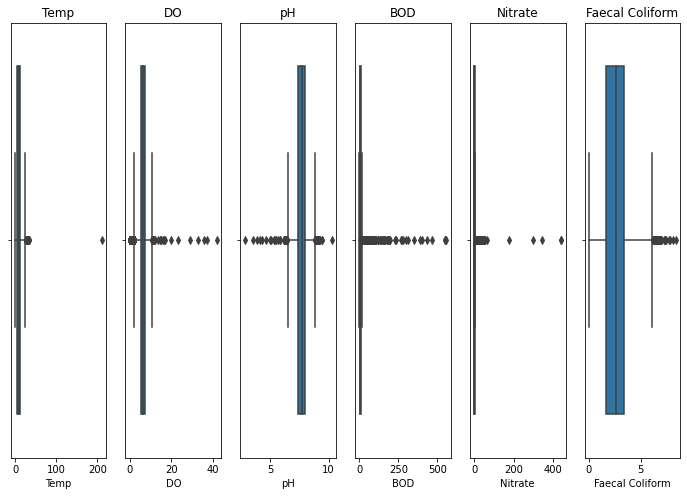

In [152]:
fig = plt.figure(figsize = (12,8))

for i in range(len(final_df_wqi.columns)-1):
  plt.subplot(1,6,i+1,title = final_df_wqi.columns[i])
  sbn.boxplot(final_df_wqi[final_df_wqi.columns[i]])

-6.574999999999999
15.625
Outliers :  472


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


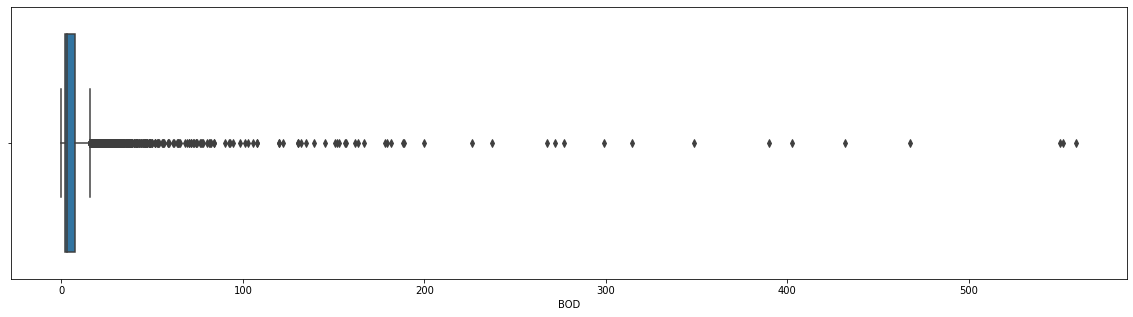

In [153]:
fig = plt.figure(figsize = (20,5))
sbn.boxplot(final_df_wqi['BOD'])
quantiles = np.quantile(final_df_wqi['BOD'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
# ax = fig.add_subplot(111)
# ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
#           color='b', ls=':', lw=0.5, zorder=0)
# ax.set_xticks(quantiles)
a = 0
q1 = quantiles[1];q3  = quantiles[3]
iqr = q3 - q1
bod_min = q1 - iqr * 1.5
bod_max = q3 + 1.5 * iqr
print(bod_min)
print(bod_max)
for i in final_df_wqi['BOD']:
  if ((i > bod_max) or (i < bod_min)):
    a+=1
print("Outliers : ",a)
if bod_min < 0:
  bod_min = 0
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-7.0
25.0
Outliers :  35


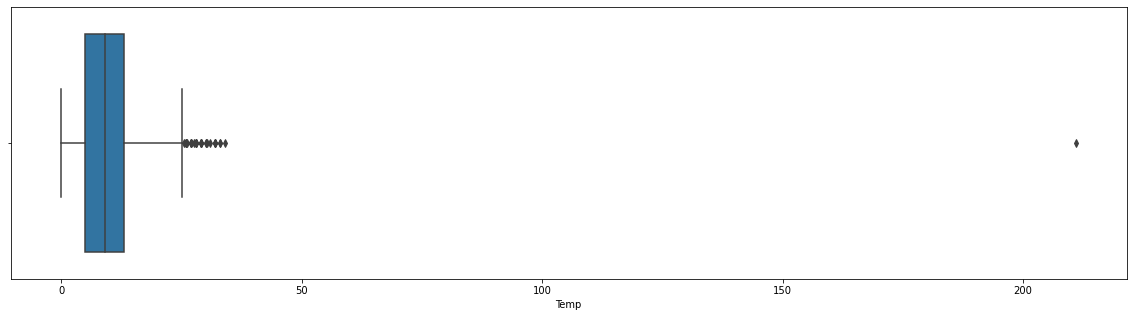

In [154]:
fig = plt.figure(figsize = (20,5))
sbn.boxplot(final_df_wqi['Temp'])
quantiles = np.quantile(final_df_wqi['Temp'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
# ax = fig.add_subplot(111)
# ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
#           color='b', ls=':', lw=0.5, zorder=0)
# ax.set_xticks(quantiles)

a = 0
q1 = quantiles[1];q3  = quantiles[3]
iqr = q3 - q1
temp_min = q1 - iqr * 1.5
temp_max = q3 + 1.5 * iqr
print(temp_min)
print(temp_max)
for i in final_df_wqi['Temp']:
  if i < temp_min or i > temp_max:
    a+=1
print("Outliers : ",a)
if temp_min < 0:
  temp_min = 0
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


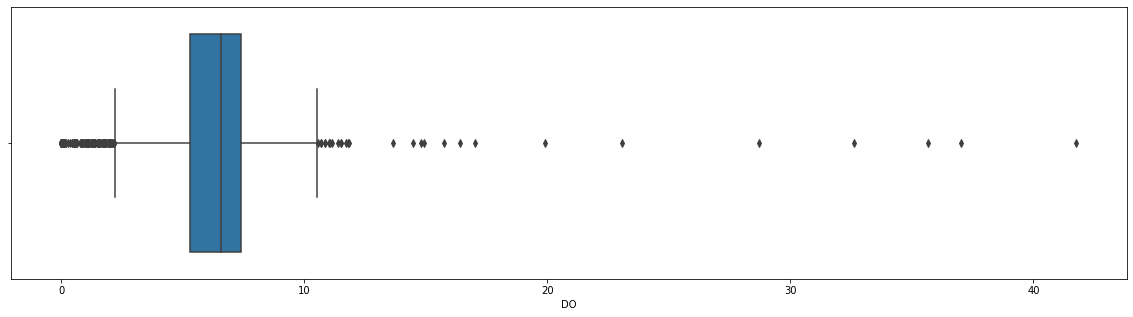

2.1500000000000026
10.549999999999997
Outliers :  205


In [155]:
fig = plt.figure(figsize = (20,5))
sbn.boxplot(final_df_wqi['DO'])
quantiles = np.quantile(final_df_wqi['DO'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
# ax = fig.add_subplot(111)
# ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
#           color='b', ls=':', lw=0.5, zorder=0)
# ax.set_xticks(quantiles)
plt.show()

a = 0
q1 = quantiles[1];q3  = quantiles[3]
iqr = q3 - q1
do_min = q1 - iqr * 1.5
do_max = q3 + 1.5 * iqr
print(do_min)
print(do_max)
for i in final_df_wqi['DO']:
  if i < do_min or i > do_max:
    a+=1
if do_min < 0:
  do_min = 0
print("Outliers : ",a)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


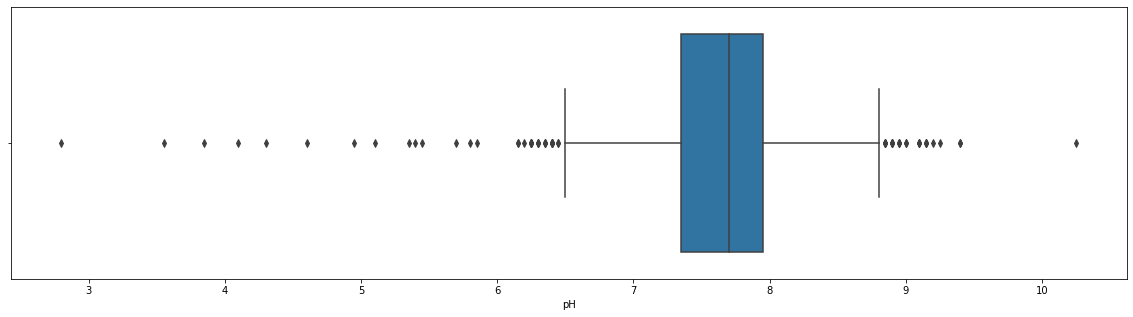

6.45
8.849999999999998
Outliers :  60


In [156]:
fig = plt.figure(figsize = (20,5))
sbn.boxplot(final_df_wqi['pH'])
quantiles = np.quantile(final_df_wqi['pH'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
# ax = fig.add_subplot(111)
# ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
#           color='b', ls=':', lw=0.5, zorder=0)
# ax.set_xticks(quantiles)
plt.show()

a = 0
q1 = quantiles[1];q3  = quantiles[3]
iqr = q3 - q1
ph_min = q1 - iqr * 1.5
ph_max = q3 + 1.5 * iqr
print(ph_min)
print(ph_max)
for i in final_df_wqi['pH']:
  if i < ph_min or i > ph_max:
    a+=1
if ph_min < 0:
  ph_min = 0
print("Outliers : ",a)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-2.3
4.98
Outliers :  445


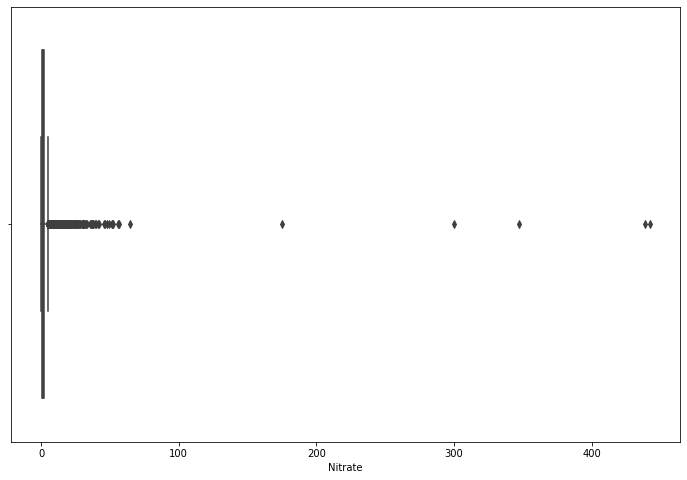

In [157]:
fig = plt.figure(figsize = (12,8))
sbn.boxplot(final_df_wqi['Nitrate'])
quantiles = np.quantile(final_df_wqi['Nitrate'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

a = 0
q1 = quantiles[1];q3  = quantiles[3]
iqr = q3 - q1
nit_min = q1 - iqr * 1.5
nit_max = q3 + 1.5 * iqr
print(nit_min)
print(nit_max)
for i in final_df_wqi['Nitrate']:
  if i > nit_max or i < nit_min:
    a+=1
if nit_min < 0:
  nit_min = 0
print("Outliers : ",a)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


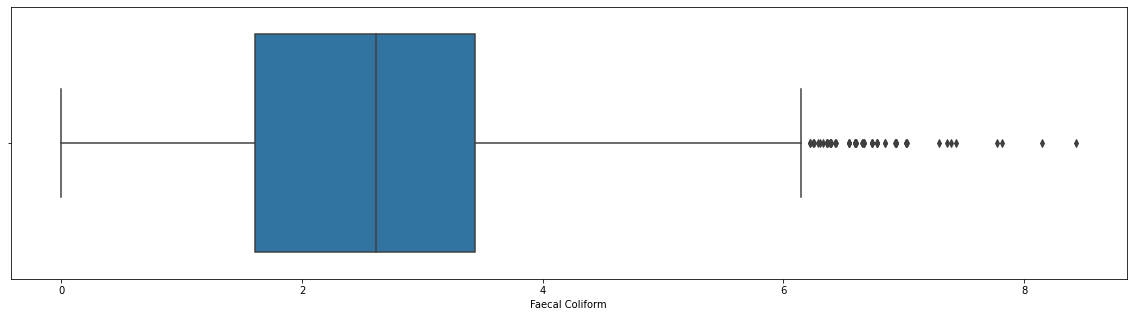

-1.1198028017746324
6.167094954210349
Outliers :  60


In [158]:
fig = plt.figure(figsize = (20,5))

sbn.boxplot(final_df_wqi['Faecal Coliform'])
quantiles = np.quantile(final_df_wqi['Faecal Coliform'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
plt.show()

a = 0
q1 = quantiles[1];q3  = quantiles[3]
iqr = q3 - q1
fc_min = q1 - iqr * 1.5
fc_max = q3 + 1.5 * iqr
print(fc_min)
print(fc_max)
for i in final_df_wqi['Faecal Coliform']:
  if i > fc_max or i < fc_min:
    a+=1
print("Outliers : ",a)

In [159]:
# Outlier Evaluation

final_df_wqi['Temp'].values[final_df_wqi['Temp'].values < temp_min] = temp_min
final_df_wqi['Temp'].values[final_df_wqi['Temp'].values > temp_max] = temp_max

final_df_wqi['BOD'].values[final_df_wqi['BOD'].values < temp_min] = temp_min
final_df_wqi['BOD'].values[final_df_wqi['BOD'].values > temp_max] = temp_max

final_df_wqi['DO'].values[final_df_wqi['DO'].values < do_min] = do_min
final_df_wqi['DO'].values[final_df_wqi['DO'].values > do_max] = do_max

final_df_wqi['pH'].values[final_df_wqi['pH'].values < ph_min] =  ph_min
final_df_wqi['pH'].values[final_df_wqi['pH'].values > ph_max] = ph_max

final_df_wqi['Nitrate'].values[final_df_wqi['Nitrate'].values < nit_min] = nit_min
final_df_wqi['Nitrate'].values[final_df_wqi['Nitrate'].values > nit_max] = nit_max

final_df_wqi['Faecal Coliform'].values[final_df_wqi['Faecal Coliform'].values < fc_min] = fc_min
final_df_wqi['Faecal Coliform'].values[final_df_wqi['Faecal Coliform'].values > fc_max] = fc_max

## Z Score normalization

In [169]:
# Z Score normalization
final_data = final_df_wqi.copy(deep=True)
final_data = final_data.iloc[:,:-1]
final_data = (final_data-np.mean(final_data))/np.std(final_data)
final_data['WQI'] = final_df_wqi['WQI']
final_data

,Temp,DO,pH,BOD,Nitrate,Faecal Coliform,WQI
0,-1.167175,2.128130,-0.582328,-0.854222,-0.894501,-1.726094,72.747600
1,-1.167175,2.128130,-0.818200,-0.832647,-0.799162,-1.726094,72.617600
2,-0.799132,1.808248,-0.464392,-0.832647,-0.830942,-1.726094,71.507733
3,-1.167175,1.779168,-0.405424,-0.839839,-0.850010,-1.726094,72.610533
4,-1.167175,1.575607,-0.405424,-0.854222,-0.795031,-1.726094,72.640600
...,...,...,...,...,...,...,...
3933,-0.063048,-2.379298,-0.346456,2.720125,0.376687,2.618160,34.002667
3934,-0.615111,-0.052883,-2.115497,-0.710386,-0.767383,-0.409242,57.622267
3935,-0.615111,0.499640,0.832905,-0.516206,-0.862722,0.233400,51.195733
3936,-0.615111,0.121598,-1.172008,-0.731961,-1.021620,-0.277941,58.596000


In [234]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso as lasso
from sklearn.linear_model import Ridge as ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from itertools import combinations

## LINEAR REGRESSION

In [200]:
np.random.seed(5000)

In [205]:
training_data = final_data.values
X = training_data[:,:-1]; y = training_data[:,-1]
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y ,test_size = 0.20)

In [189]:
model_linear = LR()
model_linear.fit(Xtrain,ytrain)
r2_score = np.mean(cross_val_score(model_linear,X,y,cv=5))
y_pred = model_linear.predict(Xtest)
# R sqaured metric
print("R2 score is: ",r2_score)
# MSE Error
print("MSE Value is: ",MSE(ytest,y_pred,squared=True))
# RMSE Error
print("RMSE Value is: ",MSE(ytest,y_pred,squared=False))
# MAE Error
print("MAE Values is: ",MAE(ytest,y_pred))
print(model_linear.coef_)

R2 score is:  0.9009556816288026
MSE Value is:  6.862345589942621
RMSE Value is:  2.619607907672944
MAE Values is:  2.0147339065697776
[-2.43699259  0.24659479 -0.38181892 -3.69629004 -1.72892489 -5.30866557]


## Regression Excluding One Feature

In [209]:
results = []
model_linear = LR()
for col in list(final_data.columns)[:-1]:
  tmp_data = final_data.drop([col],axis=1)
  training_data = tmp_data.values
  X = training_data[:,:-1]; y = training_data[:,-1]
  Xtrain,Xtest,ytrain,ytest = train_test_split(X, y ,test_size = 0.20)
  model_linear.fit(Xtrain,ytrain)
  y_pred = model_linear.predict(Xtest)
  r2_score = np.mean(cross_val_score(model_linear,X,y,cv=5))
  mse_loss = MSE(ytest,y_pred,squared=True)
  rmse_loss = MSE(ytest,y_pred,squared=False)
  mae_loss = MAE(ytest,y_pred)
  results.append([col,r2_score,mse_loss,rmse_loss,mae_loss])
results_df = pd.DataFrame(np.array(results),columns=['Excluded Feature','r2_score','mse_loss','rmse_loss','mae_loss'])
results_df

,Excluded Feature,r2_score,mse_loss,rmse_loss,mae_loss
0,Temp,0.8283122678824082,12.6809568472644,3.5610331151597565,2.83063146162429
1,DO,0.9006198577836371,7.032467107667729,2.651879919541556,2.0300290021321556
2,pH,0.8993879066692039,7.342257993932955,2.709660125169383,2.1146296666848956
3,BOD,0.8044757003513459,13.977732364314559,3.7386805646263173,2.9458478633715703
4,Nitrate,0.8742144853753565,10.367459982405792,3.219854031226539,2.3712465724801075
5,Faecal Coliform,0.5481155008103495,33.0521820998786,5.749102721284305,4.726177104368452


## Excluding Two Features

In [216]:
results_two = []
model_linear = LR()
feature_combinations = combinations(list(final_data.columns)[:-1],4)
for comb in feature_combinations:
  tmp_data = final_data.drop(list(set(list(final_data.columns)[:-1]) - set(comb)),axis=1)
  training_data = tmp_data.values
  X = training_data[:,:-1]; y = training_data[:,-1]
  Xtrain,Xtest,ytrain,ytest = train_test_split(X, y ,test_size = 0.20)
  model_linear.fit(Xtrain,ytrain)
  y_pred = model_linear.predict(Xtest)
  r2_score = np.mean(cross_val_score(model_linear,X,y,cv=5))
  mse_loss = MSE(ytest,y_pred,squared=True)
  rmse_loss = MSE(ytest,y_pred,squared=False)
  mae_loss = MAE(ytest,y_pred)
  results_two.append([comb,r2_score,mse_loss,rmse_loss,mae_loss])
results_with_4 = pd.DataFrame(np.array(results_two),columns=['Included Feature','r2_score','mse_loss','rmse_loss','mae_loss'])
results_with_4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


,Excluded Feature,r2_score,mse_loss,rmse_loss,mae_loss
0,"(Temp, DO, pH, BOD)",0.521048,35.7375,5.97808,4.82591
1,"(Temp, DO, pH, Nitrate)",0.335622,50.5591,7.11049,5.6589
2,"(Temp, DO, pH, Faecal Coliform)",0.736995,20.1738,4.49152,3.46705
3,"(Temp, DO, BOD, Nitrate)",0.553031,33.1686,5.75922,4.70033
4,"(Temp, DO, BOD, Faecal Coliform)",0.872888,9.07221,3.01201,2.27978
5,"(Temp, DO, Nitrate, Faecal Coliform)",0.801226,14.8758,3.85691,3.0022
6,"(Temp, pH, BOD, Nitrate)",0.547687,33.1404,5.75677,4.74397
7,"(Temp, pH, BOD, Faecal Coliform)",0.870548,9.75155,3.12275,2.25141
8,"(Temp, pH, Nitrate, Faecal Coliform)",0.75355,16.119,4.01484,3.15805
9,"(Temp, BOD, Nitrate, Faecal Coliform)",0.899369,7.50961,2.74037,2.05869


## Excluding three features.

In [223]:
results_three = []
model_linear = LR()
feature_combinations = combinations(list(final_data.columns)[:-1],3)
for comb in feature_combinations:
  tmp_data = final_data.drop(list(set(list(final_data.columns)[:-1]) - set(comb)),axis=1)
  training_data = tmp_data.values
  X = training_data[:,:-1]; y = training_data[:,-1]
  Xtrain,Xtest,ytrain,ytest = train_test_split(X, y ,test_size = 0.20)
  model_linear.fit(Xtrain,ytrain)
  y_pred = model_linear.predict(Xtest)
  r2_score = np.mean(cross_val_score(model_linear,X,y,cv=5))
  mse_loss = MSE(ytest,y_pred,squared=True)
  rmse_loss = MSE(ytest,y_pred,squared=False)
  mae_loss = MAE(ytest,y_pred)
  results_three.append([comb,r2_score,mse_loss,rmse_loss,mae_loss])
results_with_3 = pd.DataFrame(np.array(results_three),columns=['Included Feature','r2_score','mse_loss','rmse_loss','mae_loss'])
results_with_3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


,Included Feature,r2_score,mse_loss,rmse_loss,mae_loss
0,"(Temp, DO, pH)",0.235535,58.2165,7.62997,6.00037
1,"(Temp, DO, BOD)",0.526875,35.3495,5.94555,4.81801
2,"(Temp, DO, Nitrate)",0.338806,47.0526,6.85949,5.45247
3,"(Temp, DO, Faecal Coliform)",0.73249,19.9124,4.46233,3.38298
4,"(Temp, pH, BOD)",0.523081,32.7843,5.72575,4.62811
5,"(Temp, pH, Nitrate)",0.279604,54.3562,7.37266,5.91574
6,"(Temp, pH, Faecal Coliform)",0.593076,31.8487,5.64346,4.39013
7,"(Temp, BOD, Nitrate)",0.552316,32.1489,5.67,4.6038
8,"(Temp, BOD, Faecal Coliform)",0.870278,9.81354,3.13266,2.35121
9,"(Temp, Nitrate, Faecal Coliform)",0.752843,16.3525,4.04382,3.17987


In [229]:
final_data['water_label'] = final_data['WQI'].apply(lambda x: 2 if x > 55 else (1 if 35 <= x < 55 else 0))

In [232]:
final_data

,Temp,DO,pH,BOD,Nitrate,Faecal Coliform,WQI,water_label
0,-1.167175,2.128130,-0.582328,-0.854222,-0.894501,-1.726094,72.747600,2
1,-1.167175,2.128130,-0.818200,-0.832647,-0.799162,-1.726094,72.617600,2
2,-0.799132,1.808248,-0.464392,-0.832647,-0.830942,-1.726094,71.507733,2
3,-1.167175,1.779168,-0.405424,-0.839839,-0.850010,-1.726094,72.610533,2
4,-1.167175,1.575607,-0.405424,-0.854222,-0.795031,-1.726094,72.640600,2
...,...,...,...,...,...,...,...,...
3933,-0.063048,-2.379298,-0.346456,2.720125,0.376687,2.618160,34.002667,0
3934,-0.615111,-0.052883,-2.115497,-0.710386,-0.767383,-0.409242,57.622267,2
3935,-0.615111,0.499640,0.832905,-0.516206,-0.862722,0.233400,51.195733,1
3936,-0.615111,0.121598,-1.172008,-0.731961,-1.021620,-0.277941,58.596000,2


## Classfication of Water Quality

In [239]:
results = []
model_logistic = LogisticRegression()
for col in list(final_data.columns)[:-2]:
  tmp_data = final_data.drop([col],axis=1)
  training_data = tmp_data.values
  X = training_data[:,:-2]; y = training_data[:,-1]
  Xtrain,Xtest,ytrain,ytest = train_test_split(X, y ,test_size = 0.20)
  model_logistic.fit(Xtrain,ytrain)
  y_pred = model_logistic.predict(Xtest)
  avg_score = model_logistic.score(Xtest,ytest)
  # r2_score = np.mean(cross_val_score(model_linear,X,y,cv=5))
  # mse_loss = MSE(ytest,y_pred,squared=True)
  # rmse_loss = MSE(ytest,y_pred,squared=False)
  # mae_loss = MAE(ytest,y_pred)
  results.append([col,avg_score])
results_ = pd.DataFrame(np.array(results),columns=['Excluded Feature','score'])
results_

,Excluded Feature,score
0,Temp,0.8794416243654822
1,DO,0.9416243654822335
2,pH,0.9441624365482234
3,BOD,0.8654822335025381
4,Nitrate,0.9238578680203046
5,Faecal Coliform,0.766497461928934
